(authoring/jupyter-notebooks)=
# Jupyter Notebooks

This notebook is a demonstration of directly-parsing Jupyter Notebooks into
Sphinx using the MyST parser.[^download]

[^download]: This notebook can be downloaded as **{nb-download}`jupyter-notebooks.ipynb`** and {download}`jupyter-notebooks.md`

## Markdown

:::{seealso}
For more information about what you can write with MyST Markdown, see the
[MyST Parser syntax guide](myst:syntax/syntax).
:::

### Configuration

The MyST-NB parser derives from [the base MyST-Parser](myst:intro/get-started), and so all the same configuration options are available.
See the [MyST configuration options](myst:sphinx/config-options) for the full set of options, and [MyST syntax guide](myst:example_syntax) for all the syntax options.

To build documentation from this notebook, the following options are set:

```python
myst_enable_extensions = [
    "amsmath",
    "colon_fence",
    "deflist",
    "dollarmath",
    "html_image",
]
myst_url_schemes = ("http", "https", "mailto")
```

:::{note}
Loading the `myst_nb` extension also activates the [`myst_parser`](myst:index) extension, for enabling the MyST flavour of Markdown.
It is not required to add this explicitly in the list of `extensions`.
:::

### Syntax

As you can see, markdown is parsed as expected. Embedding images should work as expected.
For example, here's the MyST-NB logo:

```md
![myst-nb logo](../_static/logo-wide.svg)
```

![myst-nb logo](../_static/logo-wide.svg)

By adding `"html_image"` to the `myst_enable_extensions` list in the sphinx configuration ([see here](myst:syntax/images)), you can even add HTML `img` tags with attributes:

```html
<img src="../_static/logo-wide.svg" alt="logo" width="200px" class="shadow mb-2">
```

<img src="../_static/logo-wide.svg" alt="logo" width="200px"  class="shadow mb-2">

Because MyST-NB is using the MyST-markdown parser, you can include rich markdown with Sphinx in your notebook.
For example, here's a note admonition block:

:::::{note}
**Wow**, a note!
It was generated with this code ([as explained here](myst:syntax/admonitions)):

````md
:::{note}
**Wow**, a note!
:::
````

:::::

If you wish to use "bare" LaTeX equations, then you should add `"amsmath"` to the `myst_enable_extensions` list in the sphinx configuration.
This is [explained here](myst:syntax/amsmath), and works as such:

```latex
\begin{equation}
\frac {\partial u}{\partial x} + \frac{\partial v}{\partial y} = - \, \frac{\partial w}{\partial z}
\end{equation}

\begin{align*}
2x - 5y &=  8 \\
3x + 9y &=  -12
\end{align*}
```

\begin{equation}
\frac {\partial u}{\partial x} + \frac{\partial v}{\partial y} = - \, \frac{\partial w}{\partial z}
\end{equation}

\begin{align*}
2x - 5y &=  8 \\
3x + 9y &=  -12
\end{align*}

Also you can use features like **equation numbering** and referencing in the notebooks:

```md
$$e^{i\pi} + 1 = 0$$ (euler)
```

$$e^{i\pi} + 1 = 0$$ (euler)

Euler's identity, equation {math:numref}`euler`, was elected one of the
most beautiful mathematical formulas.

You can see the syntax used for this example [here in the MyST documentation](myst:syntax/math).

## Code cells and outputs

You can run cells, and the cell outputs will be captured and inserted into
the resulting Sphinx site.

### `__repr__` and HTML outputs

For example, here's some simple Python:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
data = np.random.rand(3, 100) * 100
data[:, :10]

array([[44.49398262, 60.40581612, 38.02410325,  6.38207721, 26.23079074,
         3.65195813,  0.79628509, 71.49224259, 67.22395558, 72.04183088],
       [83.27203564,  5.86520761, 86.48423533,  4.51884833, 52.19946579,
        26.75057903,  1.68781273, 36.0906908 , 73.31840215, 61.74990076],
       [65.75123912, 89.19893862, 86.11537353, 58.38931338,  7.98197669,
        99.18519512, 93.72257236, 77.92715284, 56.13413576, 68.61269424]])

This will also work with HTML outputs

In [2]:
import pandas as pd
df = pd.DataFrame(data.T, columns=['a', 'b', 'c'])
df.head()

,a,b,c
0,44.493983,83.272036,65.751239
1,60.405816,5.865208,89.198939
2,38.024103,86.484235,86.115374
3,6.382077,4.518848,58.389313
4,26.230791,52.199466,7.981977


as well as math outputs

In [3]:
from IPython.display import Math
Math(r"\sum_{i=0}^n i^2 = \frac{(n^2+n)(2n+1)}{6}")

<IPython.core.display.Math object>

This works for error messages as well:

In [4]:
print("This will be properly printed...")
print(thiswont)

This will be properly printed...


NameError: name 'thiswont' is not defined

### Images

Images that are generated from your code (e.g., with Matplotlib) will also
be embedded.

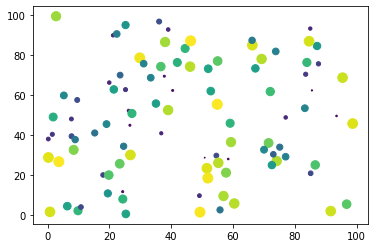

In [5]:
fig, ax = plt.subplots()
ax.scatter(*data, c=data[2])

## Raw cells

The [raw cell type](https://nbformat.readthedocs.io/en/latest/format_description.html#raw-nbconvert-cells) can be used to specifically render the content as a specific [MIME media type](https://developer.mozilla.org/en-US/docs/Web/HTTP/Basics_of_HTTP/MIME_types).

````markdown
```{raw-cell}
:format: text/html

<p>My cat is <strong>very</strong> grumpy.</p>
```
````